In [2]:
%matplotlib inline
import random
from skimage import io
from skimage.transform import resize
from collections import defaultdict
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from skimage.feature import hog
import numpy as np

In [3]:
def IOU(A,B):
    x_overlap = max(0, min(B[0],B[2]) - max(A[0],A[2]))
    y_overlap = max(0, min(B[1],B[3]) - max(A[1],A[3]))
    inter = x_overlap * y_overlap;
    
    
#     x1 = max(A[0],B[0])
#     y1 = max(A[1],B[1])
#     x2 = min(A[2],B[2])
#     y2 = min(A[3],B[3])
    
#     w = x2 - x1 + 1
#     h = y2 - y1 + 1
    
#     if w<=0 or h<=0:
#         return 0
    
#     inter = w*h
    
    A_area = (A[2] - A[0] + 1)*(A[3] - A[1] + 1)
    B_area = (B[2] - B[0] + 1)*(B[3] - B[1] + 1)
    
    # print B[0],B[1]
    
    union = (A_area + B_area - inter)*1.0
    inter = inter*1.0
    
    return inter/union

In [4]:
base_dir = '/home/ayush/GPU_ML/ML/workspace/project/raw/'

win_size = 128


train_x_grp_1_pos = []
train_y_grp_1_pos = []

train_x_grp_2_pos = []
train_y_grp_2_pos = []

train_x_grp_3_pos = []
train_y_grp_3_pos = []

train_x_grp_4_pos = []
train_y_grp_4_pos = []

train_x_grp_5_pos = []
train_y_grp_5_pos = []

train_x_grp_1_neg = []
train_y_grp_1_neg = []

train_x_grp_2_neg = []
train_y_grp_2_neg = []

train_x_grp_3_neg = []
train_y_grp_3_neg = []

train_x_grp_4_neg = []
train_y_grp_4_neg = []

train_x_grp_5_neg = []
train_y_grp_5_neg = []

with open('bounding_boxes.csv','r') as f:
    f.readline()
    for line in f:
        data = line.strip().split(',')
        
        file_name = data[0]
        grp = int(file_name.split('_')[0]) - 1
        
        label_s = data[-1]
        
        x1,y1,x2,y2,label_i = map(int, data[1:])
        
        file_path = base_dir + label_s + '/' + file_name
        img = io.imread(file_path, as_grey = True)
        h,w = img.shape[:2]
        
        #  hand image
        imgg = img[y1:y2,x1:x2]
        imgg = resize(imgg, (win_size,win_size) )
        if grp/4 == 0:
            train_x_grp_1_pos.append(imgg)
            train_y_grp_1_pos.append(1)
        elif grp/2 == 1:
            train_x_grp_2_pos.append(imgg)
            train_y_grp_2_pos.append(1)
        elif grp/2 == 2:
            train_x_grp_3_pos.append(imgg)
            train_y_grp_3_pos.append(1)
        elif grp/2 == 3:
            train_x_grp_4_pos.append(imgg)
            train_y_grp_4_pos.append(1)
        elif grp/2 == 4:
            train_x_grp_5_pos.append(imgg)
            train_y_grp_5_pos.append(1)
        
        
        # non-hand image
        count = 0
        A = [x1,y1,x2,y2]
        
        while True:
            x1_r = random.randrange(0,w - win_size)
            y1_r = random.randrange(0,h - win_size)
            x2_r = x1_r + win_size
            y2_r = y1_r + win_size
            
            if y2_r >= h or x2_r>=w:
                continue
            
            B = [x1_r, y1_r, x2_r, y2_r]
            
            if IOU(A,B) < 0.1:
                if grp/4 == 0:
                    train_x_grp_1_neg.append(img[y1_r:y2_r,x1_r:x2_r])
                    train_y_grp_1_neg.append(0)
                elif grp/4 == 1:
                    train_x_grp_2_neg.append(img[y1_r:y2_r,x1_r:x2_r])
                    train_y_grp_2_neg.append(0)
                elif grp/4 == 2:
                    train_x_grp_3_neg.append(img[y1_r:y2_r,x1_r:x2_r])
                    train_y_grp_3_neg.append(0)
                elif grp/4 == 3:
                    train_x_grp_4_neg.append(img[y1_r:y2_r,x1_r:x2_r])
                    train_y_grp_4_neg.append(0)
                elif grp/4 == 4:
                    train_x_grp_5_neg.append(img[y1_r:y2_r,x1_r:x2_r])
                    train_y_grp_5_neg.append(0)
                
                
                count += 1
            
            if count >= 2:
                break

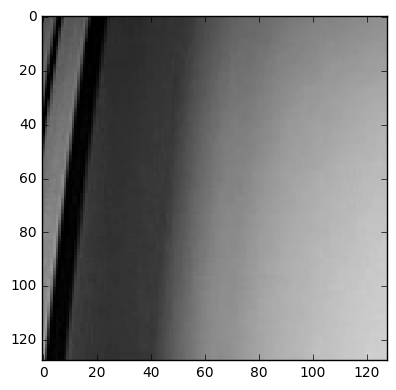

In [5]:
# print train_x_neg[1]
io.imshow(train_x_grp_1_neg[0])

In [7]:
train_x_grp_1_pos_hog = map(lambda x : hog(x), train_x_grp_1_pos)
train_x_grp_2_pos_hog = map(lambda x : hog(x), train_x_grp_2_pos)
train_x_grp_3_pos_hog = map(lambda x : hog(x), train_x_grp_3_pos)
train_x_grp_4_pos_hog = map(lambda x : hog(x), train_x_grp_4_pos)
train_x_grp_5_pos_hog = map(lambda x : hog(x), train_x_grp_5_pos)

train_x_grp_1_neg_hog = map(lambda x : hog(x), train_x_grp_1_neg)
train_x_grp_2_neg_hog = map(lambda x : hog(x), train_x_grp_2_neg)
train_x_grp_3_neg_hog = map(lambda x : hog(x), train_x_grp_3_neg)
train_x_grp_4_neg_hog = map(lambda x : hog(x), train_x_grp_4_neg)
train_x_grp_5_neg_hog = map(lambda x : hog(x), train_x_grp_5_neg)

In [22]:
train_x_1 = train_x_grp_2_pos_hog + train_x_grp_3_pos_hog + train_x_grp_4_pos_hog  \
+ train_x_grp_2_neg_hog + train_x_grp_3_neg_hog + train_x_grp_4_neg_hog

train_y_1 = train_y_grp_2_pos + train_y_grp_3_pos + train_y_grp_4_pos  \
+ train_y_grp_2_neg + train_y_grp_3_neg + train_y_grp_4_neg

val_x_1 = train_x_grp_1_pos_hog + train_x_grp_1_neg_hog
val_y_1 = train_y_grp_1_pos + train_y_grp_1_neg


train_x_2 = train_x_grp_1_pos_hog + train_x_grp_3_pos_hog + train_x_grp_4_pos_hog \
+ train_x_grp_1_neg_hog + train_x_grp_3_neg_hog + train_x_grp_4_neg_hog

train_y_2 = train_y_grp_1_pos + train_y_grp_3_pos + train_y_grp_4_pos  \
+ train_y_grp_1_neg + train_y_grp_3_neg + train_y_grp_4_neg

val_x_2 = train_x_grp_2_pos_hog + train_x_grp_2_neg_hog
val_y_2 = train_y_grp_2_pos + train_y_grp_2_neg


train_x_3 = train_x_grp_1_pos_hog + train_x_grp_2_pos_hog + train_x_grp_4_pos_hog \
+ train_x_grp_1_neg_hog + train_x_grp_2_neg_hog + train_x_grp_4_neg_hog

train_y_3 = train_y_grp_1_pos + train_y_grp_2_pos + train_y_grp_4_pos  \
+ train_y_grp_1_neg + train_y_grp_2_neg + train_y_grp_4_neg

val_x_3 = train_x_grp_3_pos_hog + train_x_grp_3_neg_hog
val_y_3 = train_y_grp_3_pos + train_y_grp_3_neg 


train_x_4 = train_x_grp_1_pos_hog + train_x_grp_2_pos_hog + train_x_grp_3_pos_hog \
+ train_x_grp_1_neg_hog + train_x_grp_2_neg_hog + train_x_grp_3_neg_hog

train_y_4 = train_y_grp_1_pos + train_y_grp_2_pos + train_y_grp_3_pos  \
+ train_y_grp_1_neg + train_y_grp_2_neg + train_y_grp_3_neg

val_x_4 = train_x_grp_4_pos_hog + train_x_grp_4_neg_hog
val_y_4 = train_y_grp_4_pos + train_y_grp_4_neg


In [23]:
clf_1 = svm.LinearSVC()
clf_1.fit(np.asarray(train_x_1),np.asarray(train_y_1))
score_1 = clf_1.score(np.asarray(val_x_1), np.asarray(val_y_1))
print score_1

0.86


In [24]:
clf_2 = svm.LinearSVC()
clf_2.fit(np.asarray(train_x_2),np.asarray(train_y_2))
score_2 = clf_2.score(np.asarray(val_x_2), np.asarray(val_y_2))
print score_2

0.9725


In [25]:
clf_3 = svm.LinearSVC()
clf_3.fit(np.asarray(train_x_3),np.asarray(train_y_3))
score_3 = clf_3.score(np.asarray(val_x_3), np.asarray(val_y_3))
print score_3

0.946


In [26]:
clf_4 = svm.LinearSVC()
clf_4.fit(np.asarray(train_x_4),np.asarray(train_y_4))
score_4 = clf_4.score(np.asarray(val_x_4), np.asarray(val_y_4))
print score_4
print 'Average : %f' %((score_1 + score_2 + score_3 + score_4)/4)

0.962
Average : 0.935125


In [27]:
clf_11 = GaussianNB()
clf_11.fit(np.asarray(train_x_1),np.asarray(train_y_1))
score_11 = clf_11.score(np.asarray(val_x_1), np.asarray(val_y_1))
print score_11

0.815


In [28]:
clf_22 = GaussianNB()
clf_22.fit(np.asarray(train_x_2),np.asarray(train_y_2))
score_22 = clf_22.score(np.asarray(val_x_2), np.asarray(val_y_2))
print score_22

0.9375


In [29]:
clf_33 = GaussianNB()
clf_33.fit(np.asarray(train_x_3),np.asarray(train_y_3))
score_33 = clf_33.score(np.asarray(val_x_3), np.asarray(val_y_3))
print score_33

0.91


In [30]:
clf_44 = GaussianNB()
clf_44.fit(np.asarray(train_x_4),np.asarray(train_y_4))
score_44 = clf_44.score(np.asarray(val_x_4), np.asarray(val_y_4))
print score_44
print 'Average : %f' %((score_11 + score_22 + score_33 + score_44)/4)

0.962
Average : 0.906125


In [31]:
'Testing using Naive Bayes clf'
val_x_5 = train_x_grp_5_pos_hog + train_x_grp_5_neg_hog
val_y_5 = train_y_grp_5_pos + train_y_grp_5_neg

In [32]:
'To get the scoring based on voting on classes given by the individual classifiers'
def get_class_by_voting(clfs, data):
    classes = defaultdict(int)
    for clf in clfs:
        classes[clf.predict(np.asarray([data]))[0]]=+1

    maxx = 0
    class_ = None
    for cls in classes:
        if classes[cls] > maxx:
            maxx = classes[cls]
            class_ = cls
    if class_ is None:
        print 'Aborting'
        return -1
    
    return class_

In [53]:
def get_class_prob_by_avg(clfs, data):
    classes = np.asarray([0.0, 0.0])
    for clf in clfs:
        classes+=clf.predict_proba(np.asarray([data]))[0]
    classes /= 4
    
    # return the prob. of belonging to class 1
    return classes[1]

In [55]:
def sliding_window(img, clfs):
    conf_map = np.zeros(img.shape)
    h,w = img.shape[:2]
    stride = 1
    win_size = 128
    for y in range(0,h-win_size+1,stride):
        for x in range(0,w-win_size+1,stride):
            imgg = img[y:y+win_size, x:x+win_size]
            hog_ = hog(imgg)
            class_ = get_class_prob_by_avg(clfs, hog_)
            for i in range(128):
                for j in range(128):
                    conf_map[y + i][x + j] = max(conf_map[y + i][x + j], class_)
    return conf_map

In [35]:
res = []
for data in val_x_5:
    class_ = get_class_by_voting([clf_1, clf_2, clf_3, clf_4],data)
    if class_ == -1:
        break
    
    res.append(class_)
count = 0

for index in range(len(res)):
    if val_y_5[index] == res[index]:
        count+=1
print 'score : %f' %((count*1.0)/len(res))

score : 0.896000


In [36]:
res = []
for data in val_x_5:
    class_ = get_class_by_voting([clf_11, clf_22, clf_33, clf_44],data)
    if class_ == -1:
        break
    
    res.append(class_)
count = 0

for index in range(len(res)):
    if val_y_5[index] == res[index]:
        count+=1
print 'score : %f' %((count*1.0)/len(res))

score : 0.846000


In [50]:
# print clf_11.predict_proba(val_x_5)
# print val_y_5[499]

<type 'numpy.ndarray'>


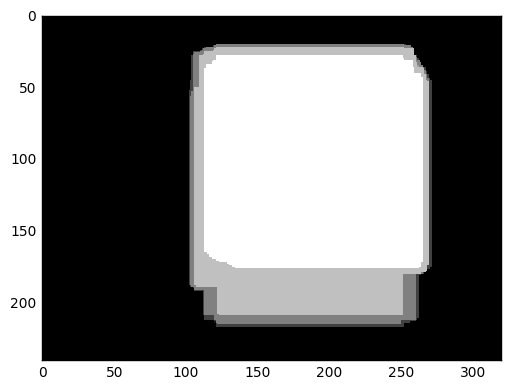

In [56]:
test_imgg = io.imread(base_dir + '1/1_31_1_cam1_0_raw.jpg',as_grey=True)
conf_map_1 = sliding_window(test_imgg, [clf_11, clf_22, clf_33, clf_44])
io.imshow(conf_map_1)

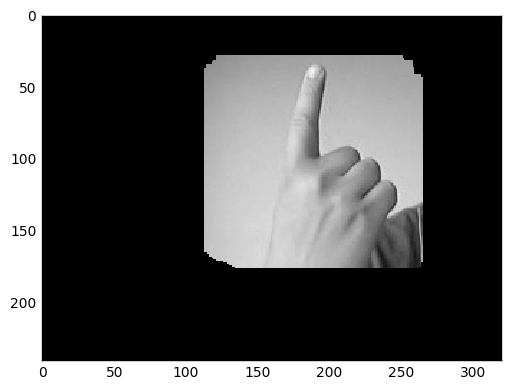

In [58]:
test_imgg1 = test_imgg.copy()
test_imgg1[conf_map_1!=conf_map_1.max()] = 0
io.imshow(test_imgg1)